<a href="https://colab.research.google.com/github/Tkundlas/Twitter-Sentiment-Analysis/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [17]:
consumerKey='4umun3DhYYgHZSfv1GDr6VwO2'
consumerSecret='JxPd6HKWh60Jyghou0v4upT6fQ82Zk1d95OB2QFphfC12duZwl'
accessToken='1546115321794527233-2Zwspl9oBGUSdqpWrw4VJd7alnT1Gq'
accessTokenSecret='dGCpu5PEygHYmtHtl4O4w39h2T9dCKWA8LYaWLSmDGKOR'

In [19]:
auth= tweepy.OAuthHandler(consumerKey,consumerSecret)

auth.set_access_token(accessToken,accessTokenSecret)

api=tweepy.API(auth,wait_on_rate_limit=True)

In [20]:
#fetching the tweets
#fetching the new tweets
posts= tweepy.Cursor(api.search,q='coronavirus',lang="en").items(200)
i=1
#fetching the old tweets
oldposts=tweepy.Cursor(api.search,q='coronavirus',lang="en", since='2020-04-01').items(200)
#creating a data frame for old and new tweets
for tweet in posts:
    df= pd.DataFrame([tweet.text for tweet in posts],columns=['Tweets'])
    oldf= pd.DataFrame([tweet.text for tweet in oldposts],columns=['Tweets'])


In [21]:
oldf.head()

,Tweets
0,"CBS, ABC, CNN sound the alarm on coronavirus B..."
1,Stuck in an almighty coronavirus metaphor at G...
2,RT @CDCgov: #COVID19 Vaccine Update: Everyone...
3,RT @Humble_Analysis: NZ vaccinated their entir...
4,RT @BernieSpofforth: NEW ZEALAND - Not to be o...


In [22]:
df.head()

,Tweets
0,Stuck in an almighty coronavirus metaphor at G...
1,RT @CDCgov: #COVID19 Vaccine Update: Everyone...
2,RT @Humble_Analysis: NZ vaccinated their entir...
3,RT @BernieSpofforth: NEW ZEALAND - Not to be o...
4,UK to offer 4th COVID-19 vaccine shot to all 5...


In [23]:
#cleaning the data
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9,.'']+','',text) #remove @mentions
    text=re.sub(r'#','',text) #Removing the # symbol
    text=re.sub(r'https?:\/\/\S+','',text)#remove hyperlink
    text=re.sub(r'RT[\s]+','',text)#removing RT
    
    return text
#cleaning the new data
df['Tweets']=df['Tweets'].apply(cleanTxt)

#show the cleaned text
df

,Tweets
0,Stuck in an almighty coronavirus metaphor at G...
1,: COVID19 Vaccine Update: Everyone 6 months a...
2,_Analysis: NZ vaccinated their entire adult po...
3,: NEW ZEALAND - Not to be outdone by China is ...
4,UK to offer 4th COVID-19 vaccine shot to all 5...
...,...
194,: People must understand the reason the heatwa...
195,: BREAKING: Judicial Watch received 1651 pages...
196,_Analysis: NZ vaccinated their entire adult po...
197,_Analysis: NZ vaccinated their entire adult po...


In [24]:
#cleaning the old data
oldf['Tweets']=oldf['Tweets'].apply(cleanTxt)
#printing
oldf

,Tweets
0,"CBS, ABC, CNN sound the alarm on coronavirus B..."
1,Stuck in an almighty coronavirus metaphor at G...
2,: COVID19 Vaccine Update: Everyone 6 months a...
3,_Analysis: NZ vaccinated their entire adult po...
4,: NEW ZEALAND - Not to be outdone by China is ...
...,...
195,: People must understand the reason the heatwa...
196,: BREAKING: Judicial Watch received 1651 pages...
197,_Analysis: NZ vaccinated their entire adult po...
198,_Analysis: NZ vaccinated their entire adult po...


In [25]:
#create a function to get subjectivity (to tell its a opinion or not)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#create a function for polarity (to tell its +ve or -ve)
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
#create two new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Stuck in an almighty coronavirus metaphor at G...,0.000000,0.000000
1,: COVID19 Vaccine Update: Everyone 6 months a...,0.333333,0.166667
2,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333
3,: NEW ZEALAND - Not to be outdone by China is ...,0.151515,0.045455
4,UK to offer 4th COVID-19 vaccine shot to all 5...,0.000000,0.000000
...,...,...,...
194,: People must understand the reason the heatwa...,0.000000,0.000000
195,: BREAKING: Judicial Watch received 1651 pages...,0.000000,0.000000
196,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333
197,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333


In [26]:
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,Stuck in an almighty coronavirus metaphor at G...,0.000000,0.000000,Neutral
1,: COVID19 Vaccine Update: Everyone 6 months a...,0.333333,0.166667,Positive
2,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333,Positive
3,: NEW ZEALAND - Not to be outdone by China is ...,0.151515,0.045455,Positive
4,UK to offer 4th COVID-19 vaccine shot to all 5...,0.000000,0.000000,Neutral
...,...,...,...,...
194,: People must understand the reason the heatwa...,0.000000,0.000000,Neutral
195,: BREAKING: Judicial Watch received 1651 pages...,0.000000,0.000000,Neutral
196,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333,Positive
197,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333,Positive


In [27]:
oldf['Subjectivity']=oldf['Tweets'].apply(getSubjectivity)
oldf['Polarity']=oldf['Tweets'].apply(getPolarity)

oldf

,Tweets,Subjectivity,Polarity
0,"CBS, ABC, CNN sound the alarm on coronavirus B...",0.700000,-0.300000
1,Stuck in an almighty coronavirus metaphor at G...,0.000000,0.000000
2,: COVID19 Vaccine Update: Everyone 6 months a...,0.333333,0.166667
3,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333
4,: NEW ZEALAND - Not to be outdone by China is ...,0.151515,0.045455
...,...,...,...
195,: People must understand the reason the heatwa...,0.000000,0.000000
196,: BREAKING: Judicial Watch received 1651 pages...,0.000000,0.000000
197,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333
198,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333


In [28]:
oldf['Analysis']=oldf['Polarity'].apply(getAnalysis)
oldf

,Tweets,Subjectivity,Polarity,Analysis
0,"CBS, ABC, CNN sound the alarm on coronavirus B...",0.700000,-0.300000,Negative
1,Stuck in an almighty coronavirus metaphor at G...,0.000000,0.000000,Neutral
2,: COVID19 Vaccine Update: Everyone 6 months a...,0.333333,0.166667,Positive
3,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333,Positive
4,: NEW ZEALAND - Not to be outdone by China is ...,0.151515,0.045455,Positive
...,...,...,...,...
195,: People must understand the reason the heatwa...,0.000000,0.000000,Neutral
196,: BREAKING: Judicial Watch received 1651 pages...,0.000000,0.000000,Neutral
197,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333,Positive
198,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333,Positive


In [29]:
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

43.7

In [30]:
ptweets=df[df.Analysis=='Negative']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

16.1

In [31]:
ptweets=df[df.Analysis=='Neutral']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

40.2

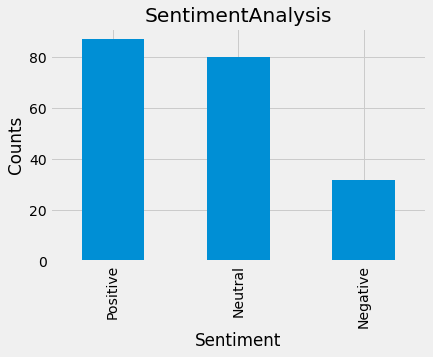

In [32]:
df['Analysis'].value_counts()

plt.title('SentimentAnalysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()